In [2]:
!pip install --upgrade tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [21]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import Adam


In [22]:
import tensorflow as tf
import pandas as pd
 
###########################
# 데이터를 준비합니다. 
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.cifar10.load_data()
print(x_train.shape, y_train.shape)

 


(50000, 32, 32, 3) (50000, 1)


In [23]:
x_train = x_train / 255.
x_test = x_test / 255.

x_train = tf.image.resize(x_train, (32, 32))
x_test = tf.image.resize(x_test, (32, 32))

# 레이블 데이터를 One-hot Encoding으로 변환
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)


In [24]:
###########################
# 모델을 완성합니다. 
X = tf.keras.layers.Input(shape=[32, 32, 3])
 
H = tf.keras.layers.Conv2D(6, kernel_size=5, activation='swish')(X)
H = tf.keras.layers.MaxPool2D()(H)
 
H = tf.keras.layers.Conv2D(16, kernel_size=5, activation='swish')(H)
H = tf.keras.layers.MaxPool2D()(H)
 
H = tf.keras.layers.Flatten()(H)
H = tf.keras.layers.Dense(120, activation='swish')(H)
H = tf.keras.layers.Dense(84, activation='swish')(H)
Y = tf.keras.layers.Dense(10, activation='softmax')(H)
 

In [25]:
 
model = tf.keras.models.Model(X, Y)
model.compile(loss='categorical_crossentropy', metrics='accuracy')
 
 

In [32]:
###########################

# 모델을 학습하고
history = model.fit(x_train, y_train, epochs=20, batch_size=128, validation_data=(x_test, y_test))


Epoch 1/20
391/391 [==============================] - 43s 107ms/step - loss: 1.8628 - accuracy: 0.3277 - val_loss: 1.6544 - val_accuracy: 0.4080
Epoch 2/20
391/391 [==============================] - 42s 106ms/step - loss: 1.5389 - accuracy: 0.4486 - val_loss: 1.4865 - val_accuracy: 0.4638
Epoch 3/20
391/391 [==============================] - 43s 110ms/step - loss: 1.4073 - accuracy: 0.4937 - val_loss: 1.3703 - val_accuracy: 0.5058
Epoch 4/20
391/391 [==============================] - 42s 108ms/step - loss: 1.3162 - accuracy: 0.5311 - val_loss: 1.3267 - val_accuracy: 0.5246
Epoch 5/20
391/391 [==============================] - 42s 108ms/step - loss: 1.2443 - accuracy: 0.5557 - val_loss: 1.2704 - val_accuracy: 0.5479
Epoch 6/20
391/391 [==============================] - 44s 113ms/step - loss: 1.1867 - accuracy: 0.5777 - val_loss: 1.2181 - val_accuracy: 0.5626
Epoch 7/20
391/391 [==============================] - 44s 112ms/step - loss: 1.1354 - accuracy: 0.5977 - val_loss: 1.1924 - val_ac

In [34]:
# 모델 확인
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 conv2d_4 (Conv2D)           (None, 28, 28, 6)         456       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 6)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 10, 10, 16)        2416      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 5, 5, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 400)               0   

In [35]:
# 모델 평가
test_loss, test_acc = model.evaluate(x_test, y_test, verbose=0)
print('Test accuracy:', test_acc)

Test accuracy: 0.6116999983787537


In [33]:
import matplotlib.pyplot as plt

# 학습 과정에서 계산한 정확도와 손실을 변수로 저장
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

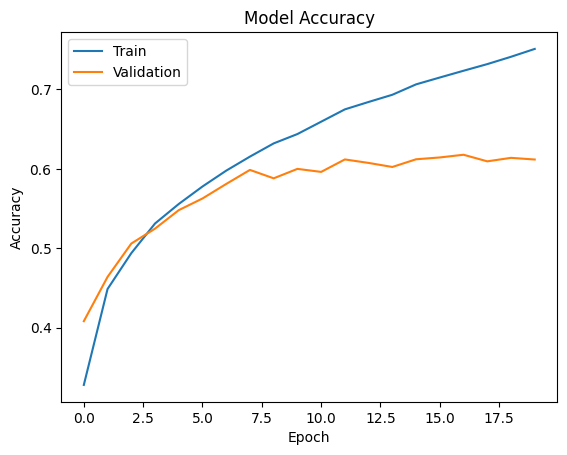

In [36]:
# 정확도 그래프
plt.plot(acc)
plt.plot(val_acc)
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

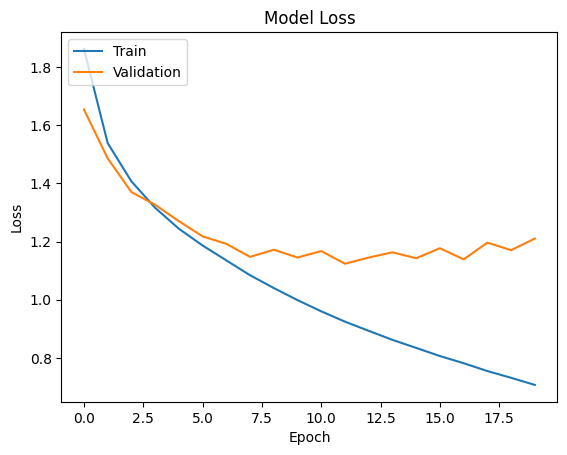

In [37]:
# 손실 그래프
plt.plot(loss)
plt.plot(val_loss)
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()
